### THE SPARKS FOUNDATION.

## Prediction Using UnSupervised Machine Learning(ML).


### Author : Paritosh Raikar

## TASK 2 : Predict the Optimum number of clusters and Represent it visually.


### Here we will use K-Means Clustering Technique.

To deciding optimum numbers of clusters for given dataset.

## Step 1 : Importing all required libraries and data file.

In [1]:
# imporing all required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# reading data file.
iris = pd.read_csv(r'C:\Users\Padmakumar\Downloads\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Reading Dataset.

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# checking the count class
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
# Descriptive Statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


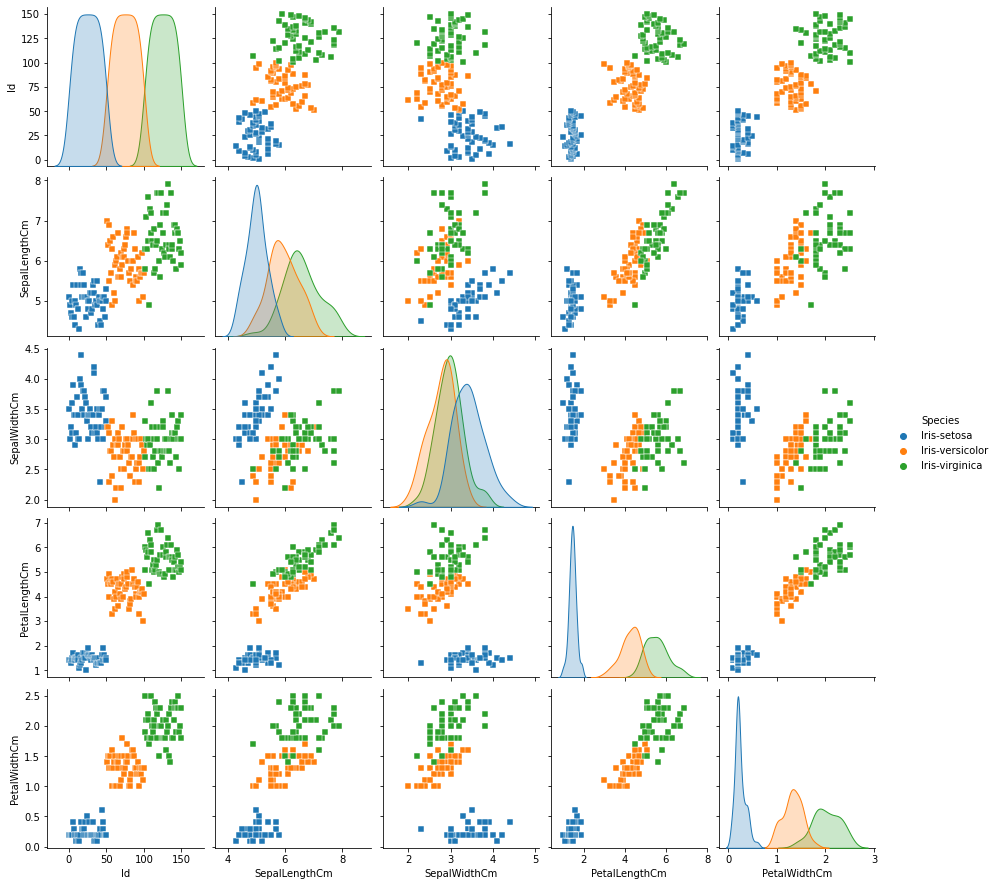

In [6]:
# visulization of the data between each column
sns.pairplot(iris , hue='Species' , markers='s')
plt.show()


<AxesSubplot:>

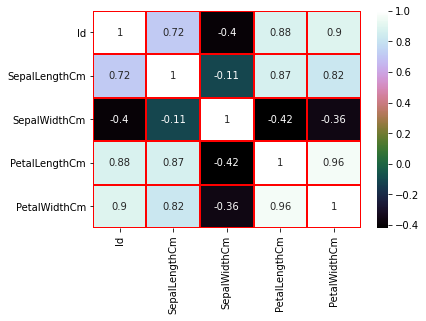

In [7]:
# Heatmap to show correlation between each column.
sns.heatmap(iris.corr() , linecolor='red' , linewidth=1 , annot=True , cmap="cubehelix")

### Predicting the value of k for the given dataset:

In [8]:
# finding the optimum number of clusters for k-means Classification
from sklearn.cluster import KMeans
x = iris.iloc[:, [0,1,2,3]].values

k_range = range(1,11)
sse = []              # sum of squares of error(SSE)

for k in k_range:
    km = KMeans(n_clusters = k, init='k-means++',max_iter=100, n_init=10,
               random_state=0)
    km.fit(x)
    sum_of_squares = km.inertia_
    sse.append(sum_of_squares)
print('Sum of Squares from k = 1 to k = 10 are as follows:')
sse

Sum of Squares from k = 1 to k = 10 are as follows:


[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17758.792503556186,
 11468.968747023802,
 7921.863473076923,
 5911.632365518538,
 4541.979023391812,
 3571.911095588236,
 2943.9331008403374]

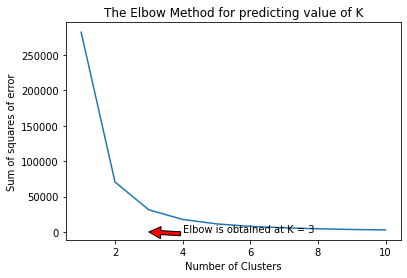

In [9]:
# Finding the optimum number of clusters for k-means classification
x = iris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, it allow us to observe elbow.
plt.plot(k_range, sse)
plt.title('The Elbow Method for predicting value of K')
plt.annotate("Elbow is obtained at K = 3",xytext = (4,200),xy=(3,78.8514),arrowprops={'facecolor':'red'})
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squares of error')
plt.show()

#### From above graph we can say that there will be 3 optimum numbers of clusters.

In [10]:
# Applying k-means to the dataset, Creating the K-means classifier.

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

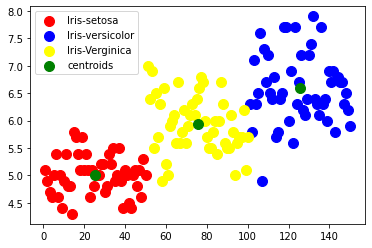

In [11]:
# Visualizing the Clusters.
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s=100, c='blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Iris-Verginica')

# Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'green', label = 'centroids')
plt.legend()

## Coclusion : From the above figure we are able to say that for the given data there are 3 clusters.

### Thank You.